In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.preprocessing import  LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df1 = pd.read_csv('./resources/dataset.csv')
df2 = pd.read_csv('./resources/symptom_description.csv')
df3 = pd.read_csv('./resources/symptom_precaution.csv')
df4 = pd.read_csv('./resources/symptom_severity.csv')

In [6]:
combined_df = pd.merge(df1, df2, on = 'Disease')
combined_df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv..."


In [7]:
combined_df = pd.merge(combined_df , df3, on = 'Disease')
combined_df.head(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [8]:
combined_df.isna().sum()

Disease            0
Symptom_1          0
Symptom_2          0
Symptom_3          0
Symptom_4        348
Symptom_5       1128
Symptom_6       1746
Symptom_7       2412
Symptom_8       2736
Symptom_9       2988
Symptom_10      3120
Symptom_11      3366
Symptom_12      3816
Symptom_13      4056
Symptom_14      4254
Symptom_15      4320
Symptom_16      4368
Symptom_17      4488
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3     120
Precaution_4     120
dtype: int64

In [9]:
X = combined_df[['Symptom_1', 'Symptom_2', 'Symptom_3','Symptom_4','Symptom_5']].copy()

In [10]:
le = LabelEncoder()

In [21]:
for i in X.columns:
    X.loc[:, i] = le.fit_transform(X.loc[:, i].astype(str)).copy()
X.head(10)

C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_42216\673180347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, i] = le.fit_transform(X.loc[:, i].astype(str)).copy()
C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_42216\673180347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, i] = le.fit_transform(X.loc[:, i].astype(str)).copy()
C:\Users\Tom Bourjala\AppData\Local\Temp\ipykernel_42216\673180347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,27,42,5,34,6
1,19,12,41,24,6
2,27,12,41,24,6
3,27,42,41,24,6
4,27,42,5,24,6
5,19,12,41,24,6
6,27,12,41,24,6
7,27,42,41,24,6
8,27,42,5,24,6
9,27,42,5,34,6


In [12]:
y = combined_df['Disease']
y.head(10)

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
5    Fungal infection
6    Fungal infection
7    Fungal infection
8    Fungal infection
9    Fungal infection
Name: Disease, dtype: object

In [13]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, random_state = 42)

Text(0, 0.5, 'Mean Error')

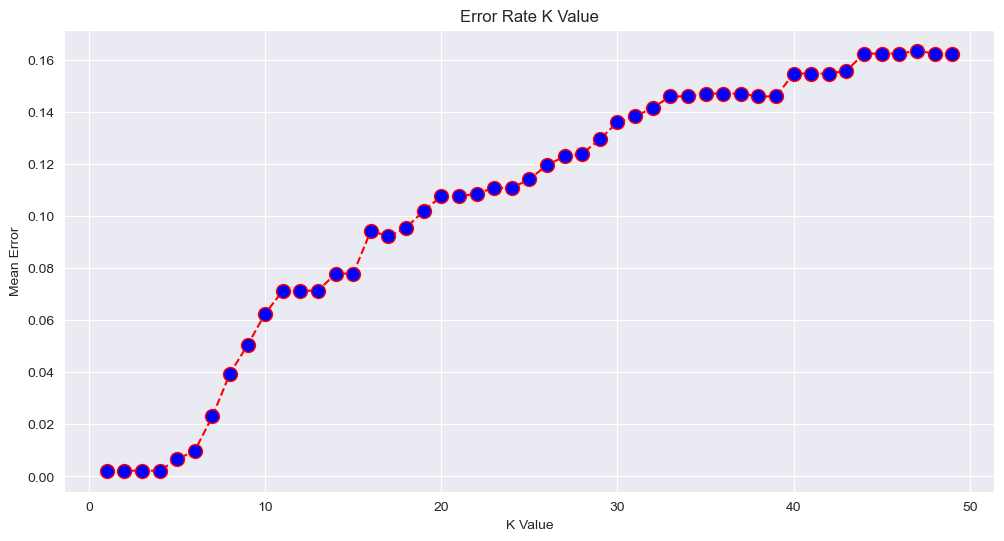

In [14]:
error = []


for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error.append(np.mean(pred_i != testY))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [15]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = classifier.predict(testX)

In [17]:
print(classification_report(testY, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        29
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      1.00      1.00        25
                    Chronic cholestasis       1.00      1.00      1.00        29
                            Common Cold       1.00      1.00      1.00        25
                           